In [1]:
import torch
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
# custom modules
from word_embedding import WordEmbeddings,WordnPositionalEmbeddings ,WordnPositionalSelfAttentionEmbeddings
from utils import plot_token_relations , vectorize_text, get_weights

In [2]:
input_texts = ["Roads ? Where we're going we don't need roads","It's alive! It's alive!","May the Force be with you.","Life finds a way"]

In [3]:
eos_symbol = '<eos>'
input_texts = [input_text.lower() + f' {eos_symbol}' for input_text in input_texts]

In [4]:
vocabulary = []
for text in input_texts:
    vocabulary.extend(text.split(' '))
vocabulary = list(set(vocabulary))

In [5]:
vocabulary

['force',
 "don't",
 'a',
 'with',
 'way',
 'finds',
 'life',
 '<eos>',
 'need',
 "it's",
 'be',
 'we',
 'roads',
 '?',
 'where',
 'you.',
 'may',
 'alive!',
 "we're",
 'the',
 'going']

In [6]:
input_encodings = []
label_encodings = []
for text in input_texts:
    inputs,labels = vectorize_text(eos_symbol,text,vocabulary)
    input_encodings.extend(inputs)
    label_encodings.extend(labels)

In [7]:
len(input_encodings[0])


21

In [8]:
len(label_encodings[0])

21

In [9]:
inputs = torch.tensor(input_encodings)
labels = torch.tensor(label_encodings)
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)

In [10]:
len(vocabulary)

21

In [11]:
word_embedding = WordEmbeddings(vocab_size=len(vocabulary),network_width=2)

Pre training parameters


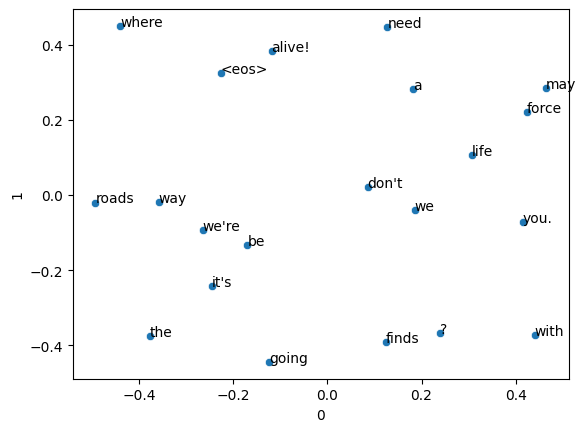

In [12]:
print('Pre training parameters')
plot_token_relations(word_embedding,vocabulary)

In [13]:
trainer = L.Trainer(max_epochs=150)
# trainer.fit(word_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Post training parameters


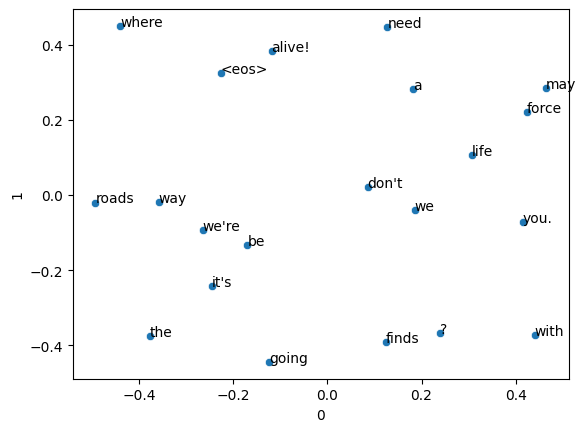

In [14]:
print('Post training parameters')
plot_token_relations(word_embedding,vocabulary)

In [15]:
weights_df = get_weights(word_embedding,vocabulary)

In [16]:
weights_df

,0,1,token
0,0.424020,0.221841,force
1,0.085620,0.021178,don't
2,0.181713,0.281792,a
3,0.440718,-0.373828,with
4,-0.358741,-0.017594,way
5,0.124038,-0.392130,finds
6,0.307673,0.106450,life
7,-0.226569,0.325947,<eos>
8,0.127205,0.446804,need
9,-0.245174,-0.241323,it's


# Positional encodings

In [17]:
word_n_positional_embedding = WordnPositionalEmbeddings(vocab_size=len(vocabulary),network_width=2)


In [18]:
trainer = L.Trainer(max_epochs=1)
trainer.fit(word_n_positional_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 84    
--------------------------------------------------
84        Trainable params
0         Non-trainable params
84        Total params
0.000     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


Post training with positional encoding parameters


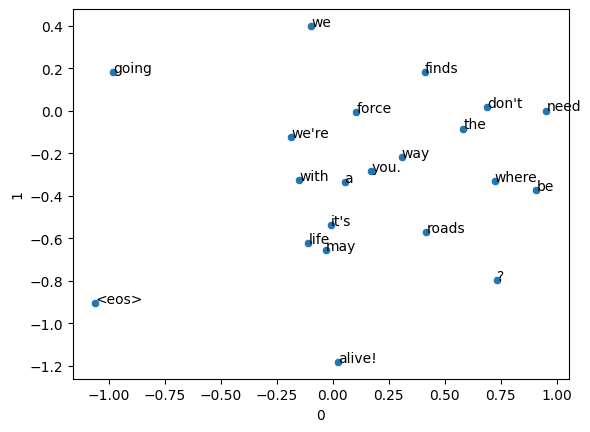

In [19]:
print('Post training with positional encoding parameters')
plot_token_relations(word_n_positional_embedding, vocabulary)

In [20]:
word_n_positional_embedding = WordnPositionalSelfAttentionEmbeddings(vocab_size=len(vocabulary),network_width=2)


In [21]:
trainer = L.Trainer(max_epochs=10)
trainer.fit(word_n_positional_embedding,train_dataloaders=dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | CrossEntropyLoss | 0     
  | other params | n/a              | 210   
--------------------------------------------------
210       Trainable params
0         Non-trainable params
210       Total params
0.001     Total estimated model params size (MB)
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\parag\.conda\envs\encoder_decoder\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of

Training: |          | 0/? [00:00<?, ?it/s]

tensor([[-0.0551,  0.0166,  0.0422, -0.0168, -0.1298,  0.0471, -0.1475, -0.1082,
         -0.0231, -0.1805,  0.0926,  0.0006,  0.1454,  0.0775, -0.0064,  0.1046,
         -0.0896, -0.0285, -0.1283, -0.1038,  0.0457],
        [-0.0508,  0.0153,  0.0390, -0.0156, -0.1198,  0.0435, -0.1362, -0.0999,
         -0.0213, -0.1666,  0.0855,  0.0006,  0.1381,  0.0704, -0.0059,  0.0966,
         -0.0827, -0.0263, -0.1184, -0.0959,  0.0422]], device='cuda:0')
torch.Size([2, 21])
tensor([[-0.0550,  0.0166,  0.0422, -0.0168, -0.1297,  0.0470, -0.1474, -0.1081,
         -0.0231, -0.1803,  0.0925,  0.0006,  0.1647,  0.0775, -0.0434,  0.1045,
         -0.0895, -0.0285, -0.1282, -0.1037,  0.0457],
        [-0.0509,  0.0153,  0.0390, -0.0156, -0.1199,  0.0435, -0.1363, -0.1000,
         -0.0213, -0.1668,  0.0855,  0.0006,  0.1523,  0.0704, -0.0419,  0.0967,
         -0.0828, -0.0263, -0.1185, -0.0960,  0.0422]], device='cuda:0')
torch.Size([2, 21])
tensor([[-0.0550,  0.0166,  0.0422, -0.0168, -0.1297,  0

`Trainer.fit` stopped: `max_epochs=10` reached.


tensor([[-0.0548,  0.0165,  0.0420, -0.0168, -0.1292,  0.0469, -0.1469, -0.0643,
         -0.0230, -0.1797,  0.0922,  0.0006,  0.1641,  0.1142, -0.0063,  0.0548,
         -0.0892, -0.0284, -0.1277, -0.1034,  0.0455],
        [-0.0511,  0.0154,  0.0392, -0.0156, -0.1203,  0.0437, -0.1368, -0.0595,
         -0.0214, -0.1674,  0.0858,  0.0006,  0.1528,  0.1064, -0.0059,  0.0510,
         -0.0831, -0.0264, -0.1189, -0.0963,  0.0424]], device='cuda:0')
torch.Size([2, 21])
tensor([[-0.0548,  0.0165,  0.0420, -0.0168, -0.1291,  0.0468, -0.1468, -0.0643,
         -0.0230, -0.1796,  0.0921,  0.0006,  0.1640,  0.1141, -0.0063,  0.1041,
         -0.0891, -0.0284, -0.1276, -0.1033,  0.0455],
        [-0.0511,  0.0154,  0.0392, -0.0156, -0.1205,  0.0437, -0.1370, -0.0595,
         -0.0214, -0.1675,  0.0859,  0.0006,  0.1530,  0.1065, -0.0059,  0.0971,
         -0.0832, -0.0265, -0.1191, -0.0964,  0.0424]], device='cuda:0')
torch.Size([2, 21])
tensor([[-0.0555,  0.0167,  0.0426, -0.0170, -0.1309,  0

Post training with positional encoding parameters


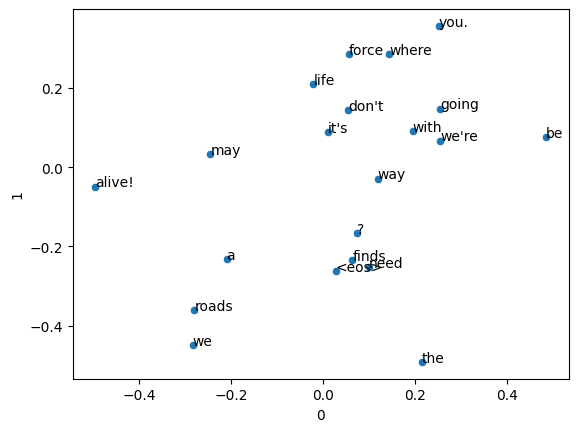

In [22]:
print('Post training with positional encoding parameters')
plot_token_relations(word_n_positional_embedding, vocabulary)

In [23]:
t = torch.tensor([])

In [24]:
torch.cat((t,torch.tensor(1)),0)

RuntimeError: zero-dimensional tensor (at position 1) cannot be concatenated